In [1]:
from jetstream_hugo.definitions import *
from jetstream_hugo.plots import *
from jetstream_hugo.data import *
from jetstream_hugo.anyspell import *
from jetstream_hugo.jet_finding import *
from jetstream_hugo.clustering import *

import colormaps

%load_ext autoreload
%autoreload 2
%matplotlib inline

# full globe jet finding

In [11]:
ds = xr.open_dataset("/storage/workspaces/giub_meteo_impacts/ci01/ERA5/plev/high_wind/dailymean/1959.nc")
dh = DataHandler(ds, "/storage/workspaces/giub_meteo_impacts/ci01/ERA5/plev/high_wind/dailymean/results")
exp = JetFindingExperiment(dh)

ds_low = xr.open_dataset("/storage/workspaces/giub_meteo_impacts/ci01/ERA5/plev/low_wind/dailymean/1959.nc")

In [15]:
from scipy import signal

In [19]:
ds_low["u"][:, 0, 0]

<xarray.DataArray 'u' (time: 365)> Size: 1kB
[365 values with dtype=float32]
Coordinates:
    lat      float32 4B -90.0
    lon      float32 4B -180.0
  * time     (time) datetime64[ns] 3kB 1959-01-01 1959-01-02 ... 1959-12-31
Attributes:
    units:          m s**-1
    long_name:      U component of wind
    standard_name:  eastward_wind

In [38]:
b, a = signal.butter(1, [1 / 6, 1 / 2.5], "bandpass")


In [42]:
u_filtered = ds_low["u"].copy(data=signal.lfilter(b, a, ds_low["u"].values, axis=0))
v_filtered = ds_low["v"].copy(data=signal.lfilter(b, a, ds_low["v"].values, axis=0))

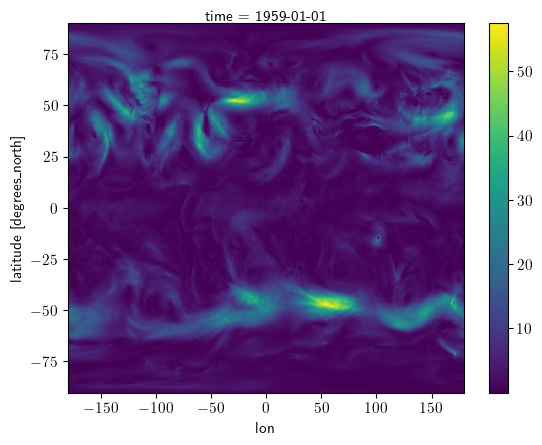

In [46]:
EKE = 0.5 * (u_filtered ** 2 + v_filtered ** 2)
EKE[0].plot()

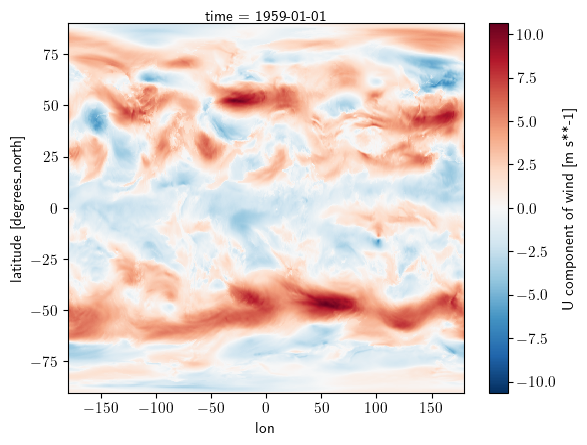

In [41]:
u_filtered[0].plot()

In [27]:
ds_low["u"][:, 0].values.shape

(365, 720)

In [6]:
all_jets = exp.find_jets()

100%|██████████| 365/365 [00:59<00:00,  6.10it/s]


In [9]:
all_jets

time,lon,lat,s,lev,u,v,theta,sigma,alignment,ds,jet ID
datetime[ns],f32,f32,f32,f32,f32,f32,f64,f32,f32,f32,u32
1959-01-01 00:00:00,-167.0,48.0,37.020218,255.754074,6.931463,33.171459,324.031907,1.5355e-7,0.765988,12.083046,0
1959-01-01 00:00:00,-167.0,49.0,38.682652,257.105347,9.152538,34.718521,323.127733,-5.7275e-8,0.897522,1.0,0
1959-01-01 00:00:00,-167.0,49.0,38.682652,257.105347,9.152538,34.718521,323.127733,-5.7275e-8,0.897522,1.0,0
1959-01-01 00:00:00,-167.0,50.0,40.171108,258.963104,11.559675,35.865513,322.214204,-4.7338e-8,0.892819,1.0,0
1959-01-01 00:00:00,-167.0,50.0,40.171108,258.963104,11.559675,35.865513,322.214204,-4.7338e-8,0.892819,1.0,0
…,…,…,…,…,…,…,…,…,…,…,…
1959-12-31 00:00:00,-73.0,-30.0,31.184958,198.446594,25.57342,-13.257168,347.350243,-5.5857e-7,0.880468,2.828427,11
1959-12-31 00:00:00,-72.0,-31.0,31.544197,195.78392,27.329046,-9.840154,347.358047,-1.7242e-7,0.666469,2.236068,11
1959-12-31 00:00:00,-72.0,-32.0,31.543697,194.386108,27.744667,-8.099261,347.20827,-6.8793e-7,0.256763,2.0,11


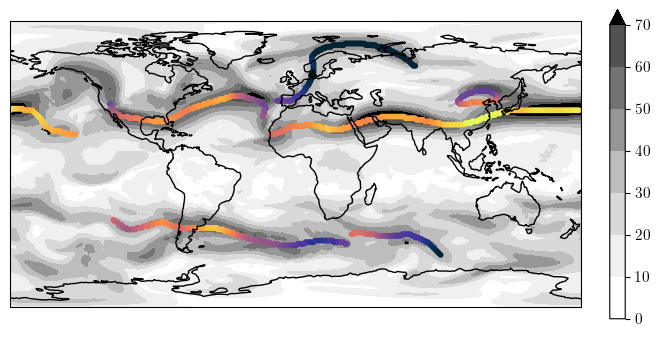

In [10]:
clu = Clusterplot(1, 1, get_region(ds))
it = np.random.choice(len(ds.time))
clu.add_contourf([ds["s"][it]], cmap=colormaps.greys, levels=7)
jets = all_jets.filter(pl.col("time") == ds["time"][it]) 
norm = Normalize(all_jets["theta"].quantile(0.05), all_jets["theta"].quantile(0.95))
for indexer, jet in jets.group_by("jet ID"):
    lon, lat, theta = jet[["lon", "lat", "theta"]].to_numpy().T
    plt.scatter(lon, lat, c=theta, lw=1, s=10, norm=norm, cmap=colormaps.thermal)

# arco-era5 tests

In [ ]:
ds = xr.open_zarr(
    "gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3",
    chunks=None,
    storage_options=dict(token="anon"),
)
ar_full_37_1h = ds.sel(
    time=slice(ds.attrs["valid_time_start"], ds.attrs["valid_time_stop"])
)

base_ds = (
    ar_full_37_1h[["u_component_of_wind", "v_component_of_wind"]]
    .sel(
        time=ar_full_37_1h.time.dt.hour % 6 == 0,
        latitude=ar_full_37_1h.latitude >= 0,
        level=[175, 200, 225, 250, 300, 350],
    )
    .isel(longitude=slice(None, None, 2), latitude=slice(None, None, 2))
)

base_path = Path(f"{DATADIR}/ERA5/plev/flat_wind/dailymean")
for year in YEARS:
    for month in range(1, 13):
        month_str = str(month).zfill(2)
        opath = base_path.joinpath(f"{year}{month_str}.nc")
        if opath.is_file():
            continue
        ds = compute(
            base_ds.sel(
                time=(base_ds.time.dt.year == year) & (base_ds.time.dt.month == month)
            ),
            progress=True,
        )
        ds = standardize(ds)
        ds["s"] = np.sqrt(ds["u"] ** 2 + ds["v"] ** 2)
        ds = flatten_by(ds, "s")
        ds.to_netcdf(opath)
        print(f"Completed {year}{month}")

In [25]:
ds = xr.open_zarr(
    "gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3",
    chunks=None,
    storage_options=dict(token="anon"),
)
ar_full_37_1h = ds.sel(
    time=slice(ds.attrs["valid_time_start"], ds.attrs["valid_time_stop"])
)

temp_full = (
    ar_full_37_1h["temperature"]
    .sel(
        time=ar_full_37_1h.time.dt.hour % 6 == 0,
        latitude=ar_full_37_1h.latitude >= 0,
        level=[175, 200, 225, 250, 300, 350],
    )
    .isel(longitude=slice(None, None, 2), latitude=slice(None, None, 2))
)

temp_full = standardize(temp_full)

In [ ]:
ds = xr.open_zarr(
    "gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3",
    chunks=None,
    storage_options=dict(token="anon"),
)
ar_full_37_1h = ds.sel(
    time=slice(ds.attrs["valid_time_start"], ds.attrs["valid_time_stop"])
)

temp_full = (
    ar_full_37_1h["temperature"]
    .sel(
        time=ar_full_37_1h.time.dt.hour % 6 == 0,
        latitude=ar_full_37_1h.latitude >= 0,
        level=[175, 200, 225, 250, 300, 350],
    )
    .isel(longitude=slice(None, None, 2), latitude=slice(None, None, 2))
)

temp_full = standardize(temp_full)

orig_path = Path(f"{DATADIR}/ERA5/plev/flat_wind/dailymean")
base_path = Path(f"{DATADIR}/ERA5/plev/flat_wind/dailymean_2")
for year in tqdm(YEARS):
    for month in trange(1, 13, leave=False):
        month_str = str(month).zfill(2)
        opath = base_path.joinpath(f"{year}{month_str}.nc")
        if opath.is_file():
            continue
        ipath = orig_path.joinpath(f"{year}{month_str}.nc")
        ds = xr.open_dataset(ipath)
        this_temp = temp_full.sel(time=ds.time.values, lev=ds["lev"])
        this_temp = this_temp * (1000 / this_temp.lev) ** KAPPA
        this_temp = this_temp.reset_coords("lev", drop=True)
        ds["theta"] = compute(this_temp, progress_flag=True)
        ds.to_netcdf(opath)

  3%|▎         | 2/64 [39:49<20:51:44, 1211.36s/it]

# Climatologies, datahandlers of new data

In [ ]:
compute_all_smoothed_anomalies("ERA5", "surf", "t2m", "dailymean", 'dayofyear', {'dayofyear': ('win', 15)}, None)

In [ ]:
compute_all_smoothed_anomalies("ERA5", "surf", "tp", "dailymean", 'dayofyear', {'dayofyear': ('win', 15)}, None)

In [ ]:
compute_all_smoothed_anomalies("ERA5", "surf", "sst", "dailymean", 'dayofyear', {'dayofyear': ('win', 15)}, None)

In [ ]:
compute_all_smoothed_anomalies("ERA5", "surf", "mslp", "dailymean", 'dayofyear', {'dayofyear': ('win', 15)}, None)

In [ ]:
compute_all_smoothed_anomalies("ERA5", "thetalev", "apvs", "dailymean", 'dayofyear', {'dayofyear': ('win', 15)}, None)

In [ ]:
compute_all_smoothed_anomalies("ERA5", "thetalev", "cpvs", "dailymean", 'dayofyear', {'dayofyear': ('win', 15)}, None)

In [ ]:
for year in tqdm(YEARS):
    da = open_da("ERA5", "thetalev", "apvs", "6H", period=[year])
    da = compute(da.chunk({"lev": 1}).resample(time="1d").mean(), progress_flag=True)
    da.to_netcdf(data_path("ERA5", "thetalev", "apvs", "dailymean").joinpath(f"{year}.nc"))

In [ ]:
for year in tqdm(YEARS):
    da = open_da("ERA5", "plev", "z", "6H", period=[year])
    da = compute(da.chunk({"lev": 1}).resample(time="1d").mean(), progress_flag=True)
    da.to_netcdf(data_path("ERA5", "plev", "z", "dailymean").joinpath(f"{year}.nc"))

In [ ]:
compute_all_smoothed_anomalies("ERA5", "plev", "z", "dailymean", 'dayofyear', {'dayofyear': ('win', 15)}, None)

In [ ]:
for year in tqdm(YEARS):
    da = open_da("ERA5", "thetalev", "cpvs", "6H", period=[year])
    da = compute(da.chunk({"lev": 1}).resample(time="1d").mean(), progress_flag=False)
    da.to_netcdf(data_path("ERA5", "thetalev", "cpvs", "dailymean").joinpath(f"{year}.nc"))

In [ ]:
da_ = compute(da.sel(lev=350), progress_flag=True)

In [ ]:
da_

In [ ]:
da_ = pl.from_pandas(da_.to_dataframe().reset_index()).cast({"lat": pl.Float32, "lon": pl.Float32, "lev": pl.UInt16})

In [ ]:
da_

In [ ]:
da_.group_by(pl.col("time").dt.ordinal_day(), pl.col("lat"), pl.col("lon")).agg(pl.col("apvs").mean())

In [ ]:
compute_all_smoothed_anomalies("ERA5", "thetalev", "apvs", "6H", 'hourofyear', {'hourofyear': ('win', 60)}, None)

In [ ]:
compute_all_smoothed_anomalies("ERA5", "thetalev", "cpvs", "6H", 'hourofyear', {'hourofyear': ('win', 60)}, None)

# new pvs das

In [ ]:
import polars_st as st

In [ ]:
def to_xarray(events: st.GeoDataFrame, dummy_da: xr.DataArray, varname: str):
    dummy_da = dummy_da.rename("dummy")
    da_df = pl.from_pandas(dummy_da.to_dataframe().reset_index())
    orig_times = da_df["time"]
    timedtype = orig_times.dtype
    da_df = da_df.drop("time", "dummy")
    da_df = da_df.unique(["lat", "lon"]).sort(["lat", "lon"]).with_columns(geometry=st.from_xy("lon", "lat"))
    da_df = st.GeoDataFrame(da_df)
    events = events.with_columns(pl.col("geometry").st.buffer(0.25))
    events = (
        events.select(["date", "geometry", varname])
        .cast({varname: pl.Float32})
        .rename({"date": "time"})
    )
    events = events.cast({"time": timedtype})
    events = events.filter(pl.col("time").is_in(orig_times))
    dummy_da = xr.zeros_like(dummy_da, dtype=np.float32)
    events = events.st.sjoin(da_df, on="geometry", how="inner", predicate="contains")
    events = events.unique(["time", "lon", "lat"])
    events_da = xr.DataArray.from_series(
        events[["time", varname, "lat", "lon"]]
        .to_pandas()
        .set_index(["time", "lat", "lon"])[varname]
    ).fillna(0)
    dummy_da.loc[
        {
            "time": events_da.time.values,
            "lat": events_da.lat.values,
            "lon": events_da.lon.values,
        }
    ] = events_da
    return dummy_da

In [ ]:
all_events = {}
for level in trange(310, 365, 5):
    events = st.from_geopandas(gpd.read_parquet(f"/storage/workspaces/giub_meteo_impacts/ci01/ERA5/RWB_index/era5_pv_streamers_{level}K_1959-2022.parquet"))

    tropospheric = events.filter(pl.col("mean_var") < pl.col("level"))
    anticyclonic = tropospheric.filter(pl.col("intensity") >= pl.col("level"))
    cyclonic = tropospheric.filter(pl.col("intensity") < pl.col("level"))
    
    all_events[level] = {"anti": anticyclonic, "cycl": cyclonic}

In [ ]:
for year in YEARS:
    # for month in range(1, 13):
    ofile_anti = Path(f"{DATADIR}/ERA5/thetalev/apvs/6H/{year}.nc")
    ofile_cycl = Path(f"{DATADIR}/ERA5/thetalev/cpvs/6H/{year}.nc")
    if ofile_cycl.is_file() and ofile_anti.is_file():
        continue
    time_mask = (TIMERANGE.year == year)# & (TIMERANGE.month == month)
    coords = {
        "time": TIMERANGE[time_mask],
        "lat": np.arange(0, 90.5, .5),
        "lon": np.arange(-180, 180, .5),
    }
    shape = [len(co) for co in coords.values()]
    dummy_da = xr.DataArray(np.zeros(shape), coords=coords)
    anti_all_levs = {}
    cycl_all_levs = {}
    for lev, events in tqdm(all_events.items(), total=11):
        anti_all_levs[lev] = to_xarray(events["anti"], dummy_da, "intensity")
        cycl_all_levs[lev] = to_xarray(events["cycl"], dummy_da, "intensity")
    anti_all_levs = xr.concat(anti_all_levs.values(), dim="lev").assign_coords(lev=list(anti_all_levs))
    cycl_all_levs = xr.concat(cycl_all_levs.values(), dim="lev").assign_coords(lev=list(cycl_all_levs))
    anti_all_levs.to_netcdf(ofile_anti)
    cycl_all_levs.to_netcdf(ofile_cycl)

# CESM

In [ ]:
from pathlib import Path
import numpy as np
import xarray as xr
basepath = Path("/storage/workspaces/giub_meteo_impacts/ci01/CESM2/flat_wind")
paths = list(basepath.iterdir())
paths = [path for path in paths if path.suffix == ".nc" and path.name != "ds.nc"]
parts = [path.name.split(".")[0].split("-") for path in paths]
parts = np.asarray(parts)
sorted_order = np.argsort([memb.replace("r10", "r0") for memb in parts[:, 0]])
parts = parts[sorted_order]
paths = [paths[i] for i in sorted_order]
all_members = np.unique(parts[:, 0])
all_years = np.unique(parts[:, 1])

not_here = []
here = []
for year in all_years:
    for member in all_members:
        potential_path = basepath.joinpath(f"{member}-{year}.nc")
        if potential_path.is_file():
            here.append(potential_path)
        else:
            not_here.append(potential_path)
len(here)

from itertools import groupby
paths_to_load = []
valid_ensembles = []
for key, indices in groupby(range(len(parts)), lambda i: parts[i][0]):
    indices = list(indices)
    group = parts[indices]
    these_paths = [paths[i] for i in indices]
    years = np.asarray(list([g[1] for g in group]))
    if len(years) == 60:
        paths_to_load.append(these_paths)
        valid_ensembles.append(key)
    else:
        print(key, len(years))

In [ ]:
from tqdm import tqdm
ds = []
for ptl in tqdm(paths_to_load):
    ds_ = []
    for p in ptl:
        this = xr.open_dataset(p)
        this = this.reset_coords("time_bnds", drop=True).drop_dims("nbnd")
        ds_.append(this)
    ds.append(xr.concat(ds_, dim="time"))
ds = xr.concat(ds, dim="member")
# ds = xr.concat([xr.concat([xr.open_dataset[ptl_] for ptl_ in ptl], dim="time") for ptl in paths_to_load], dim="member")

In [ ]:
import dask
from dask.distributed import progress, Client
from jetstream_hugo.definitions import COMPUTE_KWARGS
client = Client(**COMPUTE_KWARGS)
dask.persist(ds)
progress(ds, notebook=False)
ds = dask.compute(ds)

In [ ]:
ds = ds[0]
to_comp = ds.to_zarr(f"/storage/workspaces/giub_meteo_impacts/ci01/CESM2/flat_wind/ds.zarr", compute=False, encoding={var: {"chunks": (-1, 100, -1, -1)} for var in ds.data_vars}, mode="w")
dask.persist(to_comp)
progress(to_comp, notebook=False)
dask.compute(to_comp)